In [1]:
import pickle, torch
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [2]:
from util import LossFunction
# from m_independent import * 
# from m_dependent_d import *
import m_dependent_c as mib 
from m_encoder import *

In [3]:
# Load a pickle file
with open('data/2024-10-13_PC1D_process10_data.pkl', 'rb') as f:
    data = pickle.load(f)
    
N = 10 
step = 50

e = torch.tensor(data['strain'][:N,::step], dtype=torch.float32)
e_dot = torch.tensor(data['strain_rate'][:N,::step], dtype=torch.float32)
s = torch.tensor(data['stress'][:N,::step], dtype=torch.float32)

E = torch.tensor(data['E'][:N], dtype=torch.float32)
nu = torch.tensor(data['nu'][:N], dtype=torch.float32)

loss_function = LossFunction() 

In [4]:
ae_E = AutoEncoder(E.shape[1], 128, 10)
ae_E_optimizer = torch.optim.Adam(ae_E.parameters(), lr=1e-3)
ae_E_loss_history = []

num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step(ae_E, ae_E_optimizer, E)
    ae_E_loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        tqdm.write(f'AE E Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

  0%|          | 0/1000 [00:00<?, ?it/s]

AE E Epoch [100/1000], Loss: 0.0018
AE E Epoch [200/1000], Loss: 0.0000
AE E Epoch [300/1000], Loss: 0.0000
AE E Epoch [400/1000], Loss: 0.0000
AE E Epoch [500/1000], Loss: 0.0000
AE E Epoch [600/1000], Loss: 0.0000
AE E Epoch [700/1000], Loss: 0.0000
AE E Epoch [800/1000], Loss: 0.0000
AE E Epoch [900/1000], Loss: 0.0000
AE E Epoch [1000/1000], Loss: 0.0000


In [5]:
ae_nu = AutoEncoder(nu.shape[1], 128, 10)
ae_nu_optimizer = torch.optim.Adam(ae_nu.parameters(), lr=1e-3)
ae_nu_loss_history = []
num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step(ae_nu, ae_nu_optimizer, nu)
    ae_nu_loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        print(f'AE Nu Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')

  0%|          | 0/1000 [00:00<?, ?it/s]

AE Nu Epoch [100/1000], Loss: 0.0011
AE Nu Epoch [200/1000], Loss: 0.0002
AE Nu Epoch [300/1000], Loss: 0.0000
AE Nu Epoch [400/1000], Loss: 0.0000
AE Nu Epoch [500/1000], Loss: 0.0000
AE Nu Epoch [600/1000], Loss: 0.0000
AE Nu Epoch [700/1000], Loss: 0.0000
AE Nu Epoch [800/1000], Loss: 0.0000
AE Nu Epoch [900/1000], Loss: 0.0000
AE Nu Epoch [1000/1000], Loss: 0.0000


In [6]:
n = 8
E_recon = ae_E(E).detach().numpy()
nu_recon = ae_nu(nu).detach().numpy()
print("E reconstruction error:", loss_function.relative_error(torch.tensor(E_recon), E).item())
print("nu reconstruction error:", loss_function.relative_error(torch.tensor(nu_recon), nu).item())
plt.figure()
plt.plot(E.detach().numpy()[n], label='Original E')
plt.plot(E_recon[n], '--', label='Reconstructed E')
plt.legend()
plt.figure()
plt.plot(nu.detach().numpy()[n], label='Original nu')
plt.plot(nu_recon[n], '--', label='Reconstructed nu')
plt.legend()
plt.show()


AttributeError: 'LossFunction' object has no attribute 'relative_error'

In [7]:
vmm = mib.ViscoelasticMaterialModelM(2, 20, 2, 20)
optimizer = torch.optim.Adam(vmm.parameters(), lr=1e-3)
loss_history = []

TypeError: ViscoelasticMaterialModelM.__init__() missing 2 required positional arguments: 'E_encoder' and 'nu_encoder'

In [8]:
num_epochs = 1000
for epoch in tqdm(range(num_epochs)):
    loss = train_step(vmm, optimizer, e, e_dot, s)
    loss_history.append(loss)
    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss:.4f}')
        

  0%|          | 0/1000 [00:00<?, ?it/s]

NameError: name 'vmm' is not defined

In [9]:
n = 3
print("Training completed.")
s_pred, xi = vmm(e, e_dot)
train_error = loss_function.relative_error(s_pred, s).item()
print(f'Training Relative Error: {train_error:.4f}')
plt.figure()
plt.plot(s.detach().numpy()[n], label='True Stress')
plt.plot(s_pred.detach().numpy()[n], '--', label='Predicted Stress')

Training completed.


NameError: name 'vmm' is not defined

In [16]:
vmm_m = mib.ViscoelasticMaterialModelM(22, 200, (1, 1, 20), 20, ae_E.encoder, ae_nu.encoder)
optimizer_m = torch.optim.Adam(vmm_m.parameters(), lr=1e-3)
loss_history_m = []

In [45]:
epochs = 2000
for epoch in tqdm(range(epochs)):
    loss = mib.train_step(vmm_m, optimizer_m, e, e_dot, E, nu, s)
    loss_history_m.append(loss)
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss:.4f}')

  0%|          | 0/2000 [00:00<?, ?it/s]

Epoch [10/2000], Loss: 0.0032
Epoch [20/2000], Loss: 0.0031
Epoch [30/2000], Loss: 0.0031
Epoch [40/2000], Loss: 0.0030
Epoch [50/2000], Loss: 0.0030
Epoch [60/2000], Loss: 0.0030
Epoch [70/2000], Loss: 0.0030
Epoch [80/2000], Loss: 0.0032
Epoch [90/2000], Loss: 0.0030
Epoch [100/2000], Loss: 0.0031
Epoch [110/2000], Loss: 0.0030
Epoch [120/2000], Loss: 0.0030
Epoch [130/2000], Loss: 0.0030
Epoch [140/2000], Loss: 0.0029
Epoch [150/2000], Loss: 0.0032
Epoch [160/2000], Loss: 0.0029
Epoch [170/2000], Loss: 0.0030
Epoch [180/2000], Loss: 0.0029
Epoch [190/2000], Loss: 0.0030
Epoch [200/2000], Loss: 0.0029
Epoch [210/2000], Loss: 0.0030
Epoch [220/2000], Loss: 0.0029
Epoch [230/2000], Loss: 0.0029
Epoch [240/2000], Loss: 0.0032
Epoch [250/2000], Loss: 0.0030
Epoch [260/2000], Loss: 0.0029
Epoch [270/2000], Loss: 0.0028
Epoch [280/2000], Loss: 0.0028
Epoch [290/2000], Loss: 0.0028
Epoch [300/2000], Loss: 0.0028
Epoch [310/2000], Loss: 0.0030
Epoch [320/2000], Loss: 0.0028
Epoch [330/2000],

KeyboardInterrupt: 

/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_39958/2247246270.py:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
/var/folders/sw/6bcl4ngj0x77mrv5p1s62_k00000gn/T/ipykernel_39958/2247246270.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)


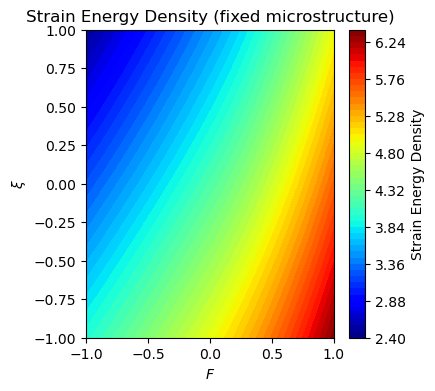

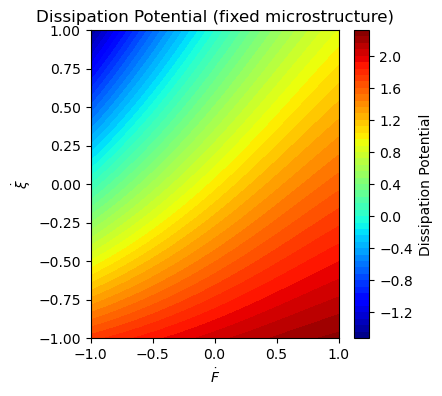

In [46]:
n = 1
x = torch.linspace(-1, 1, 50)
y = torch.linspace(-1, 1, 50)
X, Y = torch.meshgrid(x, y, indexing='ij')
X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
mu1  = torch.tensor(E[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
mu2 = torch.tensor(nu[n].clone(), dtype=torch.float32).unsqueeze(0).repeat(X.shape[0], 1)
energy = vmm_m.energy_function(X, Y, mu1, mu2)

dissipation = vmm_m.dissipation_potential(X, Y, mu1, mu2)
X = X.detach().reshape(50, 50)
Y = Y.detach().reshape(50, 50)
energy = energy.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, energy, levels=50, cmap='jet')
plt.colorbar(label='Strain Energy Density')
plt.xlabel(r'$F$')
plt.ylabel(r'$\xi$')
plt.title('Strain Energy Density (fixed microstructure)')
plt.show()

dissipation = dissipation.detach().numpy().reshape(50, 50)
plt.figure(figsize=(4,4))
plt.contourf(X, Y, dissipation, levels=50, cmap='jet')
plt.colorbar(label='Dissipation Potential')
plt.xlabel(r'$\dot{F}$')
plt.ylabel(r'$\dot{\xi}$')
plt.title('Dissipation Potential (fixed microstructure)')
plt.show()

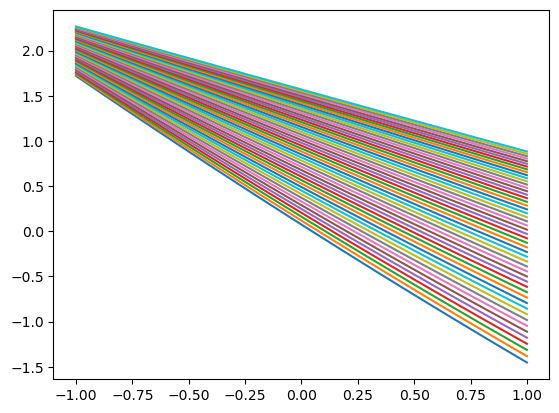

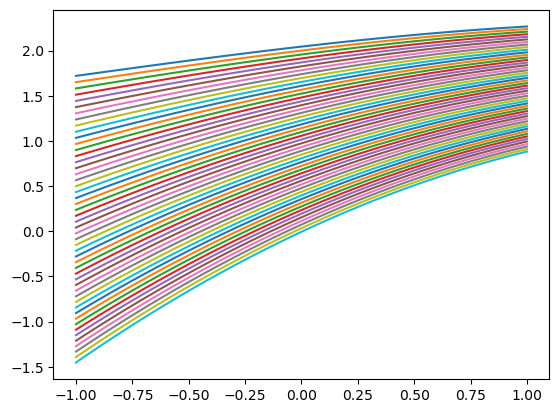

In [47]:
plt.plot(Y[0,:], dissipation.T, label='Energy slice at Y=0')
plt.show()
plt.plot(X[:,0], dissipation, label='Dissipation slice at X=0')
plt.show()

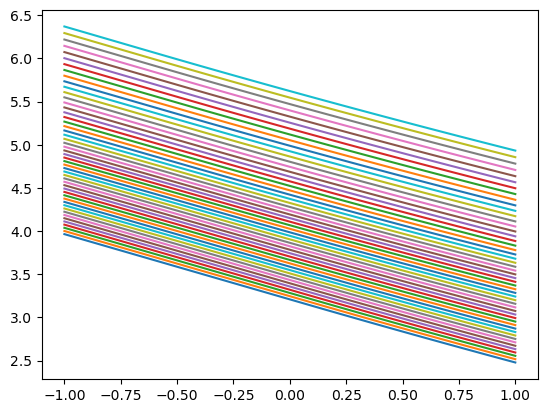

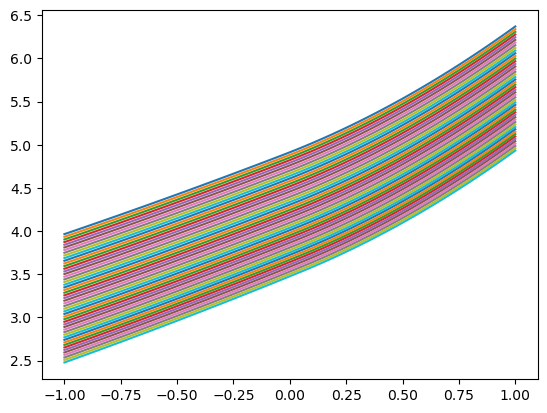

In [48]:
plt.plot(Y[0,:], energy.T, label='Energy slice at Y=0')
plt.show()
plt.plot(X[:,0], energy, label='Dissipation slice at X=0')
plt.show()

Training Relative Error with Microstructure: 0.0537


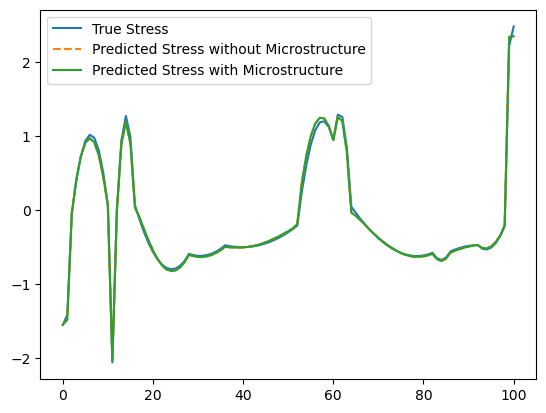

In [49]:
s_pred, _ = vmm_m(e, e_dot, E, nu)
i = 6
plt.plot(s[i,:,0].detach().numpy(), label='True Stress')
s_pred_m, xi_m = vmm_m(e, e_dot, E, nu)
plt.plot(s_pred[i,:,0].detach().numpy(), '--', label='Predicted Stress without Microstructure')
plt.plot(s_pred_m[i,:,0].detach().numpy(), label='Predicted Stress with Microstructure')
plt.legend()
train_error_m = loss_function.L2RelativeError(s_pred_m, s).item()
print(f'Training Relative Error with Microstructure: {train_error_m:.4f}')

In [28]:
vmm_m.energy_function.fc1.weight.grad.abs().mean()

tensor(0.0035)

In [30]:
vmm_m.dissipation_potential.picnn.fc1.weight.grad.abs().mean()

tensor(0.0148)

In [13]:
e.max(), e.min()

(tensor(0.4359), tensor(-0.3891))